<a href="https://colab.research.google.com/github/muhammadfawad538/AI-ML--supervised-unspervised/blob/main/MNist_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Training Part

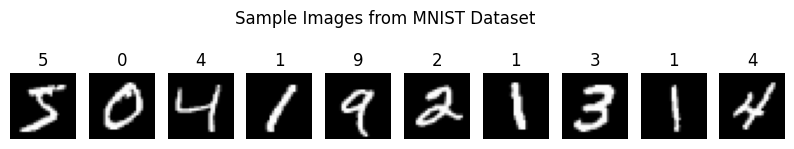

In [ ]:
# Import libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Display sample images from dataset
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.axis('off')
plt.suptitle("Sample Images from MNIST Dataset")
plt.show()

In [ ]:
# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Build the model using Sequential API
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Flatten image to 1D vector
    layers.Dense(128, activation='relu'),  # Hidden layer
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8658 - loss: 0.4685 - val_accuracy: 0.9619 - val_loss: 0.1304
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9645 - loss: 0.1202 - val_accuracy: 0.9660 - val_loss: 0.1129
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9758 - loss: 0.0798 - val_accuracy: 0.9671 - val_loss: 0.1103
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9822 - loss: 0.0560 - val_accuracy: 0.9707 - val_loss: 0.1001
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9873 - loss: 0.0411 - val_accuracy: 0.9720 - val_loss: 0.1032
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9903 - loss: 0.0295 - val_accuracy: 0.9737 - val_loss: 0.0962
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9923 - loss: 0.0239 - val_accuracy: 0.9762 - val_loss: 0.0902
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9928 - loss: 0.0215 - 

In [ ]:
# Evaluate the model on test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9704 - loss: 0.1145

✅ Test Accuracy: 0.9741


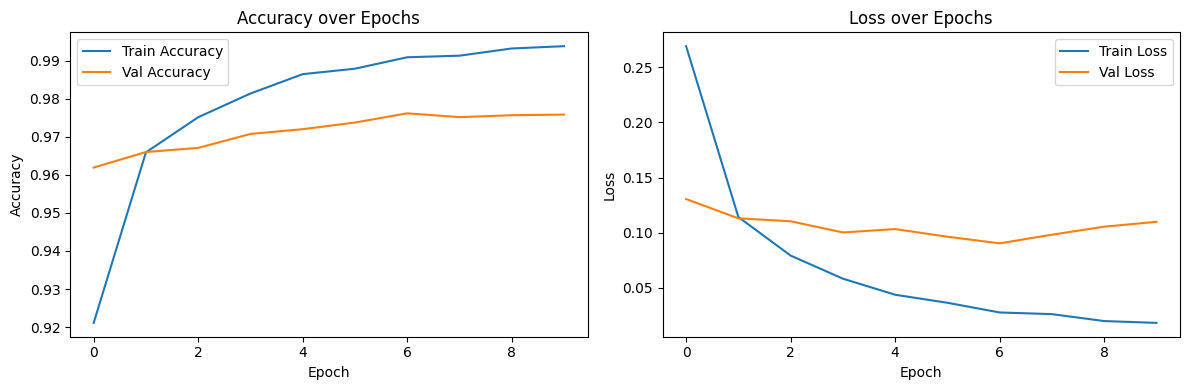

In [ ]:

# =====================
# Plot training/validation accuracy and loss
# =====================

plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


<Figure size 800x600 with 0 Axes>

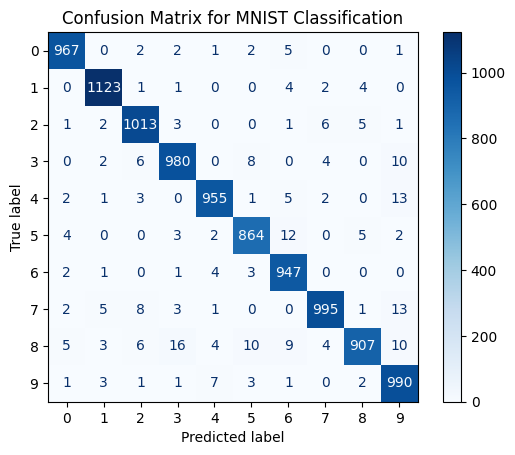

In [ ]:
# =====================
# CONFUSION MATRIX
# =====================

# Predict class probabilities and get the predicted labels
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))

# Display the confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix for MNIST Classification")
plt.show()

In [ ]:
# Save model in keras format
model.save("mnist_model.keras")

# Application with FrontEnd

In [ ]:
!pip install streamlit tensorflow pillow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 95.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 131.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.4 MB/s eta 0:00:00


In [ ]:
import streamlit as st
import tensorflow as tf
import numpy as np
from PIL import Image, ImageOps

# Load the trained model
model = tf.keras.models.load_model("mnist_model.keras")

st.title("MNIST Digit Classifier")
st.write("Upload a **digit image (0–9)**. Must be 28x28 or will be resized.")

uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "png", "jpeg"])

if uploaded_file is not None:
    image = Image.open(uploaded_file).convert("L")  # Convert to grayscale
    image = ImageOps.invert(image)                  # Invert: white digits on black
    image = image.resize((28, 28))                  # Resize to 28x28
    st.image(image, caption="Processed Image", width=150)

    img_array = np.array(image) / 255.0             # Normalize pixel values
    img_array = img_array.reshape(1, 28, 28)        # Add batch dimension

    if st.button("Predict"):
        prediction = model.predict(img_array)
        label = np.argmax(prediction)
        st.success(f"Predicted Digit: {label}")


2025-07-09 14:50:03.606 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-09 14:50:03.891 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-07-09 14:50:03.892 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-09 14:50:03.893 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-09 14:50:03.895 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-09 14:50:03.896 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-09 14:50:03.897 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-09 14:50:03.898 Thread 'MainThread': mi

***`Steps to Test and Run the Streamlit in the Colab`***
1.   Create app.py file in the side bar
2.   Copy the complete Streamlit Code into app.py file
3.   Run the **!wget -q -O - ipv4.icanhazip.com**
4.   Run the **!streamlit run app.py & npx localtunnel --port 8501**
5.   Click 'y' to get the URL
6.   Copy the IP Address output by step 3.
7.   Paste that IP Address in the opened URL asking in Tunnel Password

app.py can be changed into anyname but make sure to change the name in step 4.





In [ ]:
!wget -q -O - ipv4.icanhazip.com

34.16.240.41


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501



⠙⠹
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.16.240.41:8501

⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) y

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏your url is: https://rotten-phones-grab.loca.lt
2025-07-09 14:56:43.431591: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752073003.453504    9418 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752073003.460223    9418 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-07-09 14:56:47.324266: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding o